## Residuals in Linear Regression Model (1-D dataset)

In [112]:
# Importing useful modules/libraries

import numpy as np
import matplotlib.pyplot as plt
import os

In [113]:
# Generating X points

N = 21

# np.linspace(start, stop, num) Returns num evenly spaced samples, calculated over the interval [start, stop].
x = np.linspace(0.0, 20, N)  
# print (x)

# Reshaping the array of N elements into a (Nx1) matrix/vector format. This will be helpful in future calculations.
X0 = x.reshape(N, 1) 
# print (X0)

# We must add ones to Features vectors. We need this for that bias term
X = np.c_[np.ones((N, 1)), X0] # concatinate 1s in front of all the data points
# print (X)

- Since there is only one input feature (x), this is a 1-D data. ie. The dimesionality of the vector, D = 1
- And there are 21 datapoints. Therefore, the size of the original training dataset N = 21

## <font color='red'>np.random.normal(0, 1, N) ==> Meaning</font> 

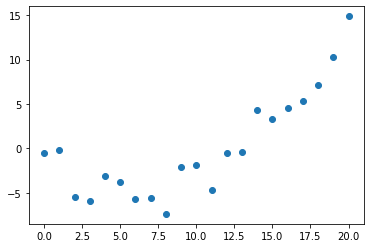

In [114]:
# Generating y points

c = np.array([-1.5, 1/9.])      # array to store the coefficient of polynomials
y = c[0]*x + c[1]*np.square(x)  # generating a perfect polynomial such that y = (-1.5)*x + (0.11)*(x^2) [This is ofc an ideal case]

# # To check the perfect x-y relationship according to the equation y = (-1.5)*x + (0.11)*(x^2)
# plt.plot(X[:, 1], y, 'o')
# plt.show()

y = y + np.random.normal(0, 1, N) * 2   # adding error part into data
plt.plot(X[:, 1], y, 'o') # X[:, 1] is 1st column of X which actually is x [0th columns is the 1's and the 1st column is x]
plt.show()

- Linear regression model:

> $ f(x, \theta) =  = b + x^{T}w $


- We can write the new linear regression model as

> $ f(x, \theta) =  = x_{aug}^{T} \theta_{aug} $
where, 

- $x_{aug} =
 \begin{pmatrix}
  1 \\
  x
 \end{pmatrix}$

- $\theta_{aug} =
 \begin{pmatrix}
  b \\
  w
 \end{pmatrix}$


## <font color='red'>theta = np.linalg.lstsq(X, y,  rcond=None)[0]  == How?</font> 

In [115]:
# Finding optimal parameters and the estimated outputs for each inputs

# linalg.lstsq(a, b, rcond='warn'): Return the least-squares solution to a linear matrix equation.
theta = np.linalg.lstsq(X, y,  rcond=None)[0]   # Return the least-squares solution to a linear matrix equation.

# theta: parameter θ = (b, w)
# theta[0] is the offset (b), theta[1] is the slope (w)

# print (X)
print(theta)

y_estim = np.dot(X, theta) 
# If a is an N-D array and b is a 1-D array, it is a sum product over the last axis of a and b.

# Comparing the estimated output with the actual labels:
print (y_estim)
# y_estim[0] = b*1 + w*x[0]
# y_estim[1] = b*1 + w*x[1]
# y_estim[2] = b*1 + w*x[2]
# ...
# y_estim[2] = b*1 + w*x[2]

print (y)

[-7.39393755  0.75094233]
[-7.39393755 -6.64299523 -5.8920529  -5.14111058 -4.39016825 -3.63922592
 -2.8882836  -2.13734127 -1.38639895 -0.63545662  0.11548571  0.86642803
  1.61737036  2.36831268  3.11925501  3.87019734  4.62113966  5.37208199
  6.12302431  6.87396664  7.62490897]
[-0.49823574 -0.22517003 -5.53457495 -5.90862251 -3.16739482 -3.80363285
 -5.7371701  -5.62865468 -7.38596793 -2.11944122 -1.90414067 -4.69185961
 -0.49533629 -0.41176991  4.32586416  3.3162635   4.58910221  5.35809372
  7.18498608 10.28551329 14.87734818]


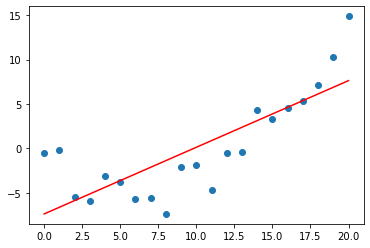

In [116]:
# Plotting regression line

plt.plot(X[:, 1], y, 'o')
plt.plot(X[:, 1], y_estim, 'r-')
plt.show()

# Linear regression on 1d data

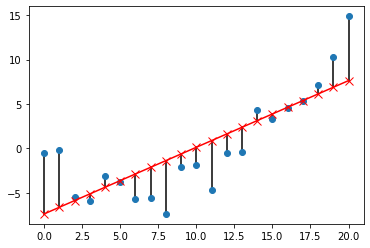

In [129]:
# Plotting the residuals

# print (X)
# print (X[:, 0]) # prints 0th column of X
# print (X[:, 1]) # prints 1st column of X which actually is x

# Plotting the vertical lines (representing the residuals)
for x0, y0, y_hat in zip(X[:, 1], y, y_estim):
    plt.plot([x0, x0], [y0, y_hat], 'k-')

plt.plot(X[:, 1], y, 'o')
plt.plot(X[:, 1], y_estim, 'r-')
plt.plot(X[:, 1], y_estim, 'x', color='r', markersize=8)
plt.show()

# The vertical lines denote the residuals between the observed output value for each input (blue circle) and its predicted value (red cross). 
# The goal of least squares regression is to pick a line that minimizes the sum of squared residuals.